# Data Story: US Mass Shootings

Mass shootings, much like serial killings, are a distinctly American phenomenon. While the US is not the only place where mass shooters (or serial killers!) have arisen, there do seem to be more of them than anywhere else in the world. Nobody seems to be safe from these tragedies. The million dollar question everyone is asking is: Why?

Is there something about the American society, or the experiences of some people in it, that drives people to the brink of violence? Do other major cultural events influence the frequency of mass shootings? Are some demographics more vulnerable to being the target of this type of violence, or of being blamed for it? Are some demographics more susceptible to commit it? What are the most common motives behind mass shootings? Is it political? Does mental health really play as big a part as right-wing media suggests? These are all controversial, but important questions to ask and investigate openly so that the American public may have a more informed, educated, and sensitive discussion on the effects of mass shootings, preventative measures, and progressive gun control laws. 

I'm going to try and answer some of these questions using Chris Awram's "US Mass Shootings" dataset from Data World.
https://data.world/awram/us-mass-shootings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
df = pd.read_csv('usmassshootings.csv') # cleaned data, originally from Mother Jones Mass Shootings database, from 1982 - 2019

In [3]:
df.head()

,case,gender,shootingtype,race,location,state,date,year,summary,fatalities,...,whereweaponobtained,typeofweapons,numweapons,assault,weapondetails,sources,mentalhealthsources,latitude,longitude,location_2
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,2015-07-16,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,...,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,True,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821,POINT(-85.31182098388672 35.047157287597656)
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,2015-06-17,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,...,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,False,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144,POINT(-79.93314361572266 32.788387298583984)
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,2014-10-24,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,Gun was his father's.,Handgun,1,False,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918,POINT(-122.17691802978516 48.05082321166992)
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2014-02-20,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,...,Unknown,Two handguns and a butcher knife,2,False,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236,POINT(-120.542236328125 41.48710250854492)
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,2013-09-16,2013,"Aaron Alexis, 34, a military veteran and contr...",12,...,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,False,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530,POINT(-76.9945297241211 38.87498092651367)


In [4]:
df.columns

Index(['case', 'gender', 'shootingtype', 'race', 'location', 'state', 'date',
       'year', 'summary', 'fatalities', 'wounded', 'totalvictims',
       'locationtype', 'priorsignsofmentalillness', 'mentalhealthnotes',
       'weaponsobtainedlegally', 'whereweaponobtained', 'typeofweapons',
       'numweapons', 'assault', 'weapondetails', 'sources',
       'mentalhealthsources', 'latitude', 'longitude', 'location_2'],
      dtype='object')

In [5]:
df.dtypes

case                          object
gender                        object
shootingtype                  object
race                          object
location                      object
state                         object
date                          object
year                           int64
summary                       object
fatalities                     int64
wounded                        int64
totalvictims                   int64
locationtype                  object
priorsignsofmentalillness       bool
mentalhealthnotes             object
weaponsobtainedlegally        object
whereweaponobtained           object
typeofweapons                 object
numweapons                     int64
assault                         bool
weapondetails                 object
sources                       object
mentalhealthsources           object
latitude                     float64
longitude                    float64
location_2                    object
dtype: object

Questions to think about:

+ most common weapons used? assault weapons? hunting grade weapons?
+ where did most people get the weapons? were they legally acquired?

+ most common places where shootings occur?

+ most common age/race/gender of shooters? 

+ any years that shootings spiked or dropped? any clusters?

+ how many injuries/fatalities/total victims on average?

+ most common types? which demographics most commonly committed each type of shooting?

+ are there certain states or areas where shootings are more common in the US? (can make some sort of map visual)

+ what part does mental health play in causing shootings?


Let's do some quick data quality checks and cleaning before we continue with our analyses.

### Missing Values

In [6]:
df.isnull().sum() 

case                          0
gender                        0
shootingtype                  0
race                          0
location                      0
state                         0
date                          0
year                          0
summary                       0
fatalities                    0
wounded                       0
totalvictims                  0
locationtype                  0
priorsignsofmentalillness     0
mentalhealthnotes             4
weaponsobtainedlegally        2
whereweaponobtained           0
typeofweapons                 0
numweapons                    0
assault                       0
weapondetails                 0
sources                       0
mentalhealthsources          11
latitude                      0
longitude                     0
location_2                    0
dtype: int64

We do have a few missing values. Let's think about this for a second. Which values are missing and what do we know about them?

+ We don't have mental health notes for 4 of the cases, but we know if there were prior signs of mental illness. We should check if these 4 cases had no prior signs of mental illness, in which case not having the mental health notes wouldn't result in a loss of information.

+ We don't know if weapons were legally obtained or not for 2 cases.

+ We don't have mental health sources for 11 cases.

In [7]:
df.describe()

,year,fatalities,wounded,totalvictims,numweapons,latitude,longitude
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2002.112676,8.042254,7.225352,15.267606,2.197183,37.815320,-96.953730
std,9.337404,5.349063,9.859292,12.681773,1.508260,6.074233,18.837319
min,1982.000000,4.000000,0.000000,5.000000,1.000000,21.325512,-157.847305
25%,1993.500000,5.000000,1.000000,7.000000,1.000000,33.745138,-117.750736
50%,2005.000000,6.000000,3.000000,11.000000,2.000000,38.583385,-90.668259
75%,2011.000000,8.500000,8.000000,18.500000,3.000000,41.915030,-81.149307
max,2015.000000,33.000000,58.000000,70.000000,9.000000,48.050823,-71.072830


## When did most mass shootings occur?

Let's think about this: In the time period of 1982 to 2019, were there any periods of time when mass shootings spiked, and if so, what else was happening during those decades? Were there any quiet periods? Are there more shootings recently than in the 80s? Or are they consistent throughout the decades?

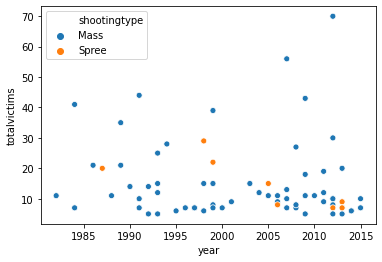

In [11]:
sns.scatterplot(data=df, x="year", y="totalvictims", hue="shootingtype")

## Weapons Used?

### How many weapons were used?

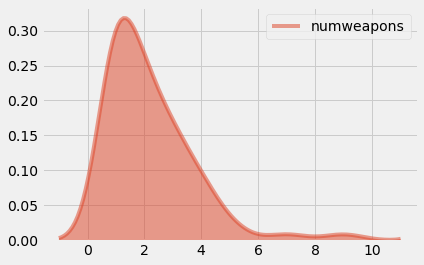

In [44]:
sns.kdeplot(data=df['numweapons'], color="#dd4124", shade=True, alpha=0.5, zorder=3)

### Were weapons usually legally obtained?

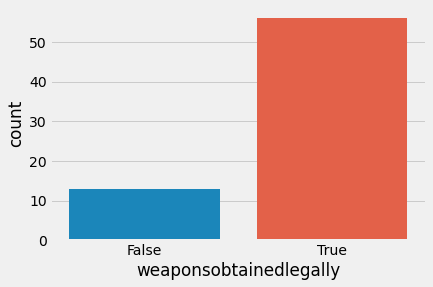

In [54]:
sns.countplot(data=df, x="weaponsobtainedlegally")

## Where in the US do mass shootings occur?

In [41]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

gdf.plot()

ModuleNotFoundError: No module named 'shapely'

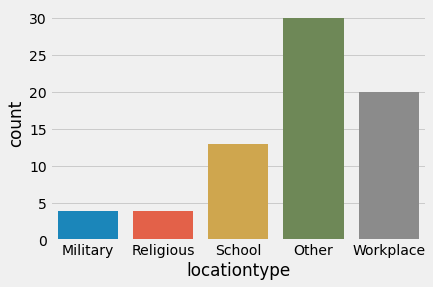

In [56]:
sns.countplot(data=df, x="locationtype")

Workplace killings are the most popular mass shooting location aside from "Other" and schools. What would be interesting is to investigate the job market and economy trends to look for crashes and to see which demographics of people are most affected by these types of events?

## What are the demographics of these mass shooters?

### Gender

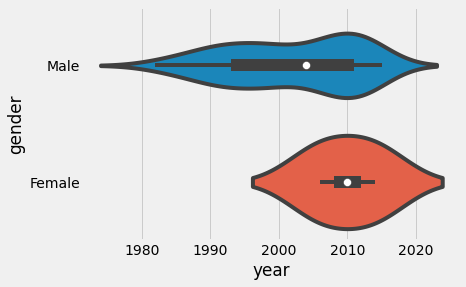

In [21]:
plt.style.use('fivethirtyeight')

sns.violinplot(x="year", y="gender", data=df)

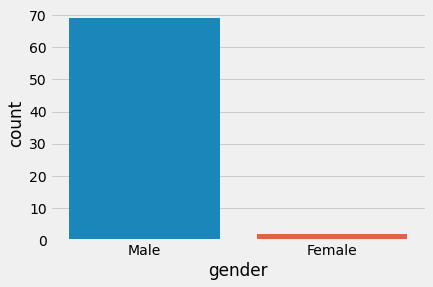

In [20]:
plt.style.use('fivethirtyeight')

sns.countplot(x="gender", data=df)

US mass shooters seem to be pretty overwhelmingly male. One common observation is that male killers often opt for more violent and bloody methods of killing, whereas female killers often go for more "quiet" methods of killing, such as poison.

### Race

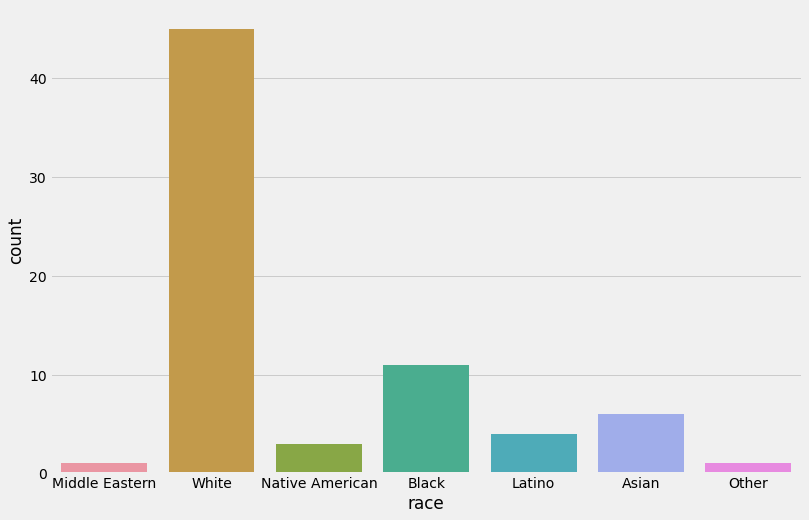

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))

sns.countplot(x="race", data=df)

We can see that the overwhelming majority of mass shooters in the US have been white men. What is going on that is making white men so prone to violence? Why are they killing? Who are they killing? I'm interested to see the demographics of the victims, as I think that could paint a clearer picture of what kinds of situations are going on.

### Mental Illness

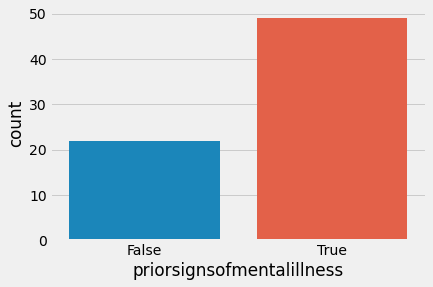

In [55]:
sns.countplot(data=df, x="priorsignsofmentalillness")

Looks like for most of the cases, there were prior signs of mental illness for the shooter. However, what kind of mental illness and what part that mental illness played, if any, are more complex questions than can be answered by this simple plot.

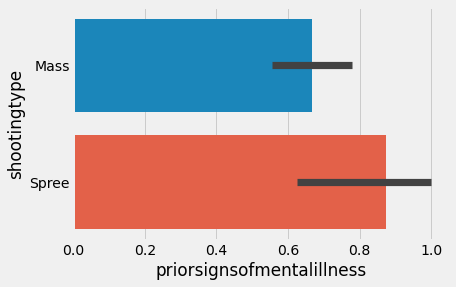

In [53]:
sns.barplot(y="shootingtype", x="priorsignsofmentalillness", data=df)

Also, seems like the cases with prior signs of mental illness often led to spree killings, as opposed to mass killings. Spree killings are often disorganized and random - the victims aren't planned and the killings aren't calculative. One note that I want to make is that this dataset excludes the 70s, which was a time when serial killings and mass murders in the US were especially prevalent. 

## What happened to the victims?

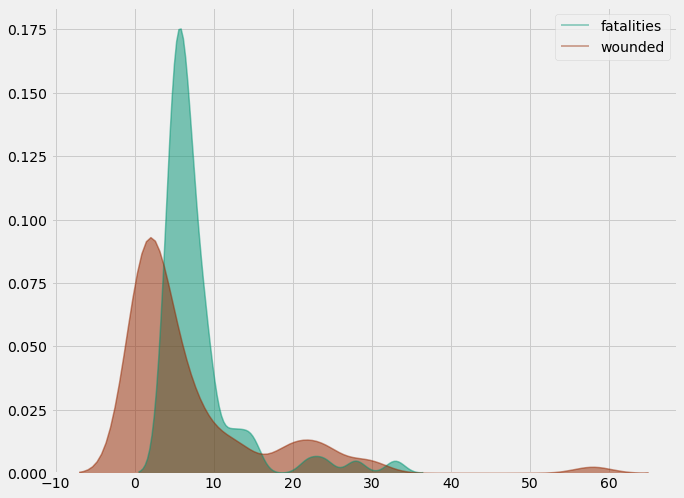

In [39]:
plt.figure(figsize=(10, 8))

sns.kdeplot(data=df['fatalities'], color='#009473', shade=True, linewidth=1.5, alpha=0.5, zorder=3)
sns.kdeplot(data=df['wounded'], color='#952700', shade=True, linewidth=1.5, alpha=0.5, zorder=3)